<a href="https://colab.research.google.com/github/MusaratKarim/Violent-Text-Detection/blob/main/textviolent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import re

# Load your CSV (update filename if needed)
df = pd.read_csv("/content/Hatespeechdetection.csv")

# Function to clean the tweet text
def clean_tweet(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+", '', text)         # Remove URLs
    text = re.sub(r"\@[A-Za-z0-9_]+", '', text)        # Remove @mentions
    text = re.sub(r"\#", '', text)                     # Remove hashtag symbol
    text = re.sub(r"[^\x00-\x7F]+", ' ', text)         # Remove emojis / non-ASCII
    text = re.sub(r"[^\w\s]", '', text)                # Remove punctuation
    text = re.sub(r"\s+", ' ', text).strip()           # Remove extra spaces
    return text

# Apply cleaning
df["clean_tweet"] = df["tweet"].apply(clean_tweet)

# Save to new CSV
df.to_csv("preprocessed_tweets.csv", index=False)

print("✅ Preprocessing done. Saved as preprocessed_tweets.csv")


✅ Preprocessing done. Saved as preprocessed_tweets.csv


In [ ]:
# Save to Google Drive
drive_path = "/content/drive/MyDrive/Colab Notebooks/Violent Text Detection/preprocessed_tweets.csv" # Change the path if needed
df.to_csv(drive_path, index=False)

print(f"✅ Preprocessing done. Saved as {drive_path}")


✅ Preprocessing done. Saved as /content/drive/MyDrive/Colab Notebooks/Violent Text Detection/preprocessed_tweets.csv


In [ ]:
import pandas as pd
import random
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')

# Load your cleaned dataset
df = pd.read_csv("/content/preprocessed_tweets.csv")

# Synonym Replacement
def synonym_replacement(text, n=2):
    # Check if text is a string and not empty
    if isinstance(text, str) and text:
        words = word_tokenize(text)
        new_words = words.copy()
        random_word_list = list(set([word for word in words if wordnet.synsets(word)]))
        random.shuffle(random_word_list)
        num_replaced = 0

        for word in random_word_list:
            synonyms = wordnet.synsets(word)
            if not synonyms:
                continue
            synonym_words = synonyms[0].lemma_names()
            if synonym_words:
                synonym = synonym_words[0].replace('_', ' ')
                new_words = [synonym if w == word else w for w in new_words]
                num_replaced += 1
            if num_replaced >= n:
                break

        return ' '.join(new_words)
    # If text is not a valid string, return it as is to prevent errors
    return text

# Apply to a portion of data (to augment only)
df_augmented = df.sample(frac=0.3, random_state=42).copy()
df_augmented["clean_tweet"] = df_augmented["clean_tweet"].apply(lambda x: synonym_replacement(x))

# Label augmented data if needed (optional for classification)
df_augmented["is_augmented"] = True
df["is_augmented"] = False

# Combine original + augmented
df_combined = pd.concat([df, df_augmented]).reset_index(drop=True)
df_combined.to_csv("augmented_tweets.csv", index=False)

print("✅ Augmentation done. Saved as augmented_tweets.csv")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


✅ Augmentation done. Saved as augmented_tweets.csv


In [ ]:
# Save to Google Drive
drive_path = "/content/drive/MyDrive/Colab Notebooks/Violent Text Detection/augmented_tweets.csv" # Change the path if needed
df_combined.to_csv(drive_path, index=False)

print(f"✅ Augmentation done. Saved as {drive_path}")


✅ Augmentation done. Saved as /content/drive/MyDrive/Colab Notebooks/Violent Text Detection/augmented_tweets.csv


In [ ]:
# prompt: load all dataset from drive

from google.colab import drive
import pandas as pd

drive.mount('/content/drive')

# List all files and directories in your Google Drive's Colab Notebooks folder
!ls "/content/drive/MyDrive/Colab Notebooks/Violent Text Detection"

# Load datasets (replace with your actual filenames and paths)
try:
    df1 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Violent Text Detection/Hatespeechdetection.csv")
    print("Dataset 'Hatespeechdetection.csv' loaded successfully.")
except FileNotFoundError:
    print("Error: 'Hatespeechdetection.csv' not found in the specified directory.")

try:
    df2 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Violent Text Detection/preprocessed_tweets.csv")
    print("Dataset 'preprocessed_tweets.csv' loaded successfully.")
except FileNotFoundError:
    print("Error: 'preprocessed_tweets.csv' not found in the specified directory.")

try:
  df3 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Violent Text Detection/augmented_tweets.csv")
  print("Dataset 'augmented_tweets.csv' loaded successfully.")
except FileNotFoundError:
  print("Error: 'augmented_tweets.csv' not found in the specified directory.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
augmented_tweets.csv	   preprocessed_tweets.csv  svm_distil_model.pkl
distilbert_embeddings.npy  rf_distil_model.pkl	    svm_model.pkl
lr_distil_model.pkl	   rf_model.pkl		    svm_sbert_model.pkl
lr_model.pkl		   rf_sbert_model.pkl	    tfidf_features.pkl
lr_sbert_model.pkl	   sbert_embeddings.npy     tfidf_vectorizer.pkl
Error: 'Hatespeechdetection.csv' not found in the specified directory.
Dataset 'preprocessed_tweets.csv' loaded successfully.
Dataset 'augmented_tweets.csv' loaded successfully.


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the cleaned + augmented tweets
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Violent Text Detection/augmented_tweets.csv")

# Replace NaN values with empty strings in 'clean_tweet' column
df['clean_tweet'] = df['clean_tweet'].fillna('')

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000)  # you can increase features if needed

# Fit and transform
tfidf_features = vectorizer.fit_transform(df["clean_tweet"])

print("✅ TF-IDF Features Shape:", tfidf_features.shape)

✅ TF-IDF Features Shape: (27312, 5000)


In [ ]:
!pip install -q sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 91.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 82.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 81.7 MB/s eta 0:00:00


In [ ]:
from sentence_transformers import SentenceTransformer

# Load model
sbert_model = SentenceTransformer('paraphrase-MiniLM-L6-v2')  # Lightweight and fast

# Generate embeddings
sbert_embeddings = sbert_model.encode(df["clean_tweet"].tolist(), show_progress_bar=True)

print("✅ Sentence-BERT Embeddings Shape:", sbert_embeddings.shape)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.51k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/854 [00:00<?, ?it/s]

✅ Sentence-BERT Embeddings Shape: (27312, 384)


In [ ]:
!pip install -q transformers

In [ ]:
from transformers import DistilBertTokenizer, DistilBertModel
import torch
import numpy as np
from tqdm import tqdm

# Load model and tokenizer
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")
model = DistilBertModel.from_pretrained("distilbert-base-uncased")
model.eval()

# Tweets list
texts = df["clean_tweet"].tolist()

# Empty list for embeddings
all_embeddings = []

# Batch-wise processing
batch_size = 32

for i in tqdm(range(0, len(texts), batch_size)):
    batch_texts = texts[i:i+batch_size]
    inputs = tokenizer(batch_texts, padding=True, truncation=True, return_tensors="pt")

    with torch.no_grad():
        outputs = model(**inputs)
        batch_embeddings = outputs.last_hidden_state[:, 0, :]  # CLS token
        all_embeddings.append(batch_embeddings)

# Stack all batches into one numpy array
distilbert_embeddings = torch.cat(all_embeddings).numpy()

print("✅ DistilBERT Embeddings Shape:", distilbert_embeddings.shape)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

100%|██████████| 854/854 [50:46<00:00,  3.57s/it]

✅ DistilBERT Embeddings Shape: (27312, 768)


In [ ]:
import pickle

# Save to Google Drive
tfidf_path = "/content/drive/MyDrive/Colab Notebooks/Violent Text Detection/tfidf_features.pkl"
vectorizer_path = "/content/drive/MyDrive/Colab Notebooks/Violent Text Detection/tfidf_vectorizer.pkl"

# Create the directory if it doesn't exist
import os
os.makedirs(os.path.dirname(tfidf_path), exist_ok=True)

# Save files
with open(tfidf_path, "wb") as f:
    pickle.dump(tfidf_features, f)

with open(vectorizer_path, "wb") as f:
    pickle.dump(vectorizer, f)

print("✅ TF-IDF features and vectorizer saved to Google Drive.")

✅ TF-IDF features and vectorizer saved to Google Drive.


In [ ]:
import numpy as np

# Save SBERT embeddings
sbert_path = "/content/drive/MyDrive/Colab Notebooks/Violent Text Detection/sbert_embeddings.npy"
np.save(sbert_path, sbert_embeddings)

print("✅ Sentence-BERT embeddings saved to Google Drive.")

✅ Sentence-BERT embeddings saved to Google Drive.


In [ ]:
# Save DistilBERT embeddings
distilbert_path = "/content/drive/MyDrive/Colab Notebooks/Violent Text Detection/distilbert_embeddings.npy"
np.save(distilbert_path, distilbert_embeddings)

print("✅ DistilBERT embeddings saved to Google Drive.")

✅ DistilBERT embeddings saved to Google Drive.


In [ ]:
import pickle

# Define paths
tfidf_path = "/content/drive/MyDrive/Colab Notebooks/Violent Text Detection/tfidf_features.pkl"
vectorizer_path = "/content/drive/MyDrive/Colab Notebooks/Violent Text Detection/tfidf_vectorizer.pkl"

# Load files
with open(tfidf_path, "rb") as f:
    tfidf_features = pickle.load(f)

with open(vectorizer_path, "rb") as f:
    vectorizer = pickle.load(f)

print("✅ TF-IDF features and vectorizer loaded.")

import numpy as np

sbert_path = "/content/drive/MyDrive/Colab Notebooks/Violent Text Detection/sbert_embeddings.npy"
sbert_embeddings = np.load(sbert_path)

print("✅ Sentence-BERT embeddings loaded.")

distilbert_path = "/content/drive/MyDrive/Colab Notebooks/Violent Text Detection/distilbert_embeddings.npy"
distilbert_embeddings = np.load(distilbert_path)

print("✅ DistilBERT embeddings loaded.")

✅ TF-IDF features and vectorizer loaded.
✅ Sentence-BERT embeddings loaded.
✅ DistilBERT embeddings loaded.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pickle

# ✅ Labels (True = 1, False = 0)
labels = df3["is_augmented"].astype(int)

# ✅ Train-test split (TF-IDF features)
X_train, X_test, y_train, y_test = train_test_split(tfidf_features, labels, test_size=0.2, random_state=42)

# ========== Logistic Regression ==========
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)

print("🔍 Logistic Regression:")
print(confusion_matrix(y_test, lr_preds))
print(classification_report(y_test, lr_preds))

# ========== Support Vector Machine ==========
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
svm_preds = svm.predict(X_test)

print("🔍 SVM:")
print(confusion_matrix(y_test, svm_preds))
print(classification_report(y_test, svm_preds))

# ========== Random Forest ==========
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

print("🔍 Random Forest:")
print(confusion_matrix(y_test, rf_preds))
print(classification_report(y_test, rf_preds))

🔍 Logistic Regression:
[[4175   24]
 [ 911  353]]
              precision    recall  f1-score   support

           0       0.82      0.99      0.90      4199
           1       0.94      0.28      0.43      1264

    accuracy                           0.83      5463
   macro avg       0.88      0.64      0.66      5463
weighted avg       0.85      0.83      0.79      5463

🔍 SVM:
[[4157   42]
 [ 834  430]]
              precision    recall  f1-score   support

           0       0.83      0.99      0.90      4199
           1       0.91      0.34      0.50      1264

    accuracy                           0.84      5463
   macro avg       0.87      0.67      0.70      5463
weighted avg       0.85      0.84      0.81      5463

🔍 Random Forest:
[[3428  771]
 [ 753  511]]
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      4199
           1       0.40      0.40      0.40      1264

    accuracy                           0.72      5463


In [ ]:
import pickle

base_path = "/content/drive/MyDrive/Colab Notebooks/Violent Text Detection/"

# Save trained models
with open(base_path + "lr_model.pkl", "wb") as f:
    pickle.dump(lr, f)

with open(base_path + "svm_model.pkl", "wb") as f:
    pickle.dump(svm, f)

with open(base_path + "rf_model.pkl", "wb") as f:
    pickle.dump(rf, f)

print("✅ Models saved to Violent Text Detection folder in Drive.")

✅ Models saved to Violent Text Detection folder in Drive.


In [ ]:
import pickle

# Define base path
base_path = "/content/drive/MyDrive/Colab Notebooks/Violent Text Detection/"

# Load Logistic Regression model
with open(base_path + "lr_model.pkl", "rb") as f:
    lr_model = pickle.load(f)

# Load SVM model
with open(base_path + "svm_model.pkl", "rb") as f:
    svm_model = pickle.load(f)

# Load Random Forest model
with open(base_path + "rf_model.pkl", "rb") as f:
    rf_model = pickle.load(f)

print("✅ All models successfully loaded!")

✅ All models successfully loaded!


In [ ]:
from sentence_transformers import SentenceTransformer
import numpy as np

# Load model
sbert_model = SentenceTransformer('paraphrase-MiniLM-L6-v2')  # Lightweight and fast

# Regenerate embeddings for all tweets in df3
sbert_embeddings = sbert_model.encode(df3["clean_tweet"].tolist(), show_progress_bar=True)

# Save SBERT embeddings
sbert_path = "/content/drive/MyDrive/Colab Notebooks/Violent Text Detection/sbert_embeddings.npy"
np.save(sbert_path, sbert_embeddings)

print("✅ Sentence-BERT Embeddings Shape:", sbert_embeddings.shape)
print("✅ Sentence-BERT embeddings saved to Google Drive.")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.51k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/854 [00:00<?, ?it/s]

✅ Sentence-BERT Embeddings Shape: (27312, 384)
✅ Sentence-BERT embeddings saved to Google Drive.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Convert is_augmented to binary labels
labels = df3["is_augmented"].astype(int)

# Train-test split
# Replacing 'sbert_features' with 'sbert_embeddings'
X_train, X_test, y_train, y_test = train_test_split(sbert_embeddings, labels, test_size=0.2, random_state=42)

# ========== Logistic Regression ==========
lr_sbert = LogisticRegression(max_iter=1000)
lr_sbert.fit(X_train, y_train)
lr_preds = lr_sbert.predict(X_test)

print("🔍 SBERT + Logistic Regression:")
print(confusion_matrix(y_test, lr_preds))
print(classification_report(y_test, lr_preds))

# ========== SVM ==========
svm_sbert = SVC(kernel='linear')
svm_sbert.fit(X_train, y_train)
svm_preds = svm_sbert.predict(X_test)

print("🔍 SBERT + SVM:")
print(confusion_matrix(y_test, svm_preds))
print(classification_report(y_test, svm_preds))

# ========== Random Forest ==========
rf_sbert = RandomForestClassifier(n_estimators=100)
rf_sbert.fit(X_train, y_train)
rf_preds = rf_sbert.predict(X_test)

print("🔍 SBERT + Random Forest:")
print(confusion_matrix(y_test, rf_preds))
print(classification_report(y_test, rf_preds))

🔍 SBERT + Logistic Regression:
[[4084  115]
 [1066  198]]
              precision    recall  f1-score   support

           0       0.79      0.97      0.87      4199
           1       0.63      0.16      0.25      1264

    accuracy                           0.78      5463
   macro avg       0.71      0.56      0.56      5463
weighted avg       0.76      0.78      0.73      5463



In [ ]:
with open(base_path + "lr_sbert_model.pkl", "wb") as f:
    pickle.dump(lr_sbert, f)

with open(base_path + "svm_sbert_model.pkl", "wb") as f:
    pickle.dump(svm_sbert, f)

with open(base_path + "rf_sbert_model.pkl", "wb") as f:
    pickle.dump(rf_sbert, f)

print("✅ SBERT-based models saved to Drive.")

✅ SBERT-based models saved to Drive.


In [ ]:
import pickle

base_path = "/content/drive/MyDrive/Colab Notebooks/Violent Text Detection/"

# Load Logistic Regression model trained on SBERT features
with open(base_path + "lr_sbert_model.pkl", "rb") as f:
    lr_sbert_model = pickle.load(f)

# Load SVM model trained on SBERT features
with open(base_path + "svm_sbert_model.pkl", "rb") as f:
    svm_sbert_model = pickle.load(f)

# Load Random Forest model trained on SBERT features
with open(base_path + "rf_sbert_model.pkl", "rb") as f:
    rf_sbert_model = pickle.load(f)

print("✅ SBERT-based models successfully loaded!")

✅ SBERT-based models successfully loaded!


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Labels
labels = df3["is_augmented"].astype(int)

# Split
X_train, X_test, y_train, y_test = train_test_split(distilbert_embeddings, labels, test_size=0.2, random_state=42)

# ========== Logistic Regression ==========
lr_distil = LogisticRegression(max_iter=1000)
lr_distil.fit(X_train, y_train)
lr_preds = lr_distil.predict(X_test)

print("🔍 DistilBERT + Logistic Regression:")
print(confusion_matrix(y_test, lr_preds))
print(classification_report(y_test, lr_preds))

# ========== SVM ==========
svm_distil = SVC(kernel='linear')
svm_distil.fit(X_train, y_train)
svm_preds = svm_distil.predict(X_test)

print("🔍 DistilBERT + SVM:")
print(confusion_matrix(y_test, svm_preds))
print(classification_report(y_test, svm_preds))

# ========== Random Forest ==========
rf_distil = RandomForestClassifier(n_estimators=100)
rf_distil.fit(X_train, y_train)
rf_preds = rf_distil.predict(X_test)

print("🔍 DistilBERT + Random Forest:")
print(confusion_matrix(y_test, rf_preds))
print(classification_report(y_test, rf_preds))

🔍 DistilBERT + Logistic Regression:
[[4084  115]
 [1067  197]]
              precision    recall  f1-score   support

           0       0.79      0.97      0.87      4199
           1       0.63      0.16      0.25      1264

    accuracy                           0.78      5463
   macro avg       0.71      0.56      0.56      5463
weighted avg       0.76      0.78      0.73      5463

🔍 DistilBERT + SVM:
[[4199    0]
 [1264    0]]
              precision    recall  f1-score   support

           0       0.77      1.00      0.87      4199
           1       0.00      0.00      0.00      1264

    accuracy                           0.77      5463
   macro avg       0.38      0.50      0.43      5463
weighted avg       0.59      0.77      0.67      5463



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


🔍 DistilBERT + Random Forest:
[[3581  618]
 [1243   21]]
              precision    recall  f1-score   support

           0       0.74      0.85      0.79      4199
           1       0.03      0.02      0.02      1264

    accuracy                           0.66      5463
   macro avg       0.39      0.43      0.41      5463
weighted avg       0.58      0.66      0.62      5463



In [ ]:
with open(base_path + "lr_distil_model.pkl", "wb") as f:
    pickle.dump(lr_distil, f)

with open(base_path + "svm_distil_model.pkl", "wb") as f:
    pickle.dump(svm_distil, f)

with open(base_path + "rf_distil_model.pkl", "wb") as f:
    pickle.dump(rf_distil, f)

print("✅ DistilBERT models saved.")

✅ DistilBERT models saved.


In [ ]:
# Load DistilBERT models later
with open(base_path + "lr_distil_model.pkl", "rb") as f:
    lr_distil_model = pickle.load(f)

with open(base_path + "svm_distil_model.pkl", "rb") as f:
    svm_distil_model = pickle.load(f)

with open(base_path + "rf_distil_model.pkl", "rb") as f:
    rf_distil_model = pickle.load(f)

print("✅ DistilBERT models loaded.")

✅ DistilBERT models loaded.


In [ ]:
import pickle
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Define path
base_path = "/content/drive/MyDrive/Colab Notebooks/Violent Text Detection/"
dataset_file = "augmented_tweets.csv"

# Load dataset
df = pd.read_csv(base_path + dataset_file)
labels = df["is_augmented"].astype(int)

# Load features
with open(base_path + "sbert_embeddings.npy", "rb") as f:
    sbert_features = np.load(f)

with open(base_path + "distilbert_embeddings.npy", "rb") as f:
    distilbert_features = np.load(f)

# Split
X_train_sbert, X_test_sbert, y_train, y_test = train_test_split(sbert_features, labels, test_size=0.2, random_state=42)
X_train_distil, X_test_distil, _, _ = train_test_split(distilbert_features, labels, test_size=0.2, random_state=42)

# Load models
with open(base_path + "lr_sbert_model.pkl", "rb") as f: lr_sbert = pickle.load(f)
with open(base_path + "svm_sbert_model.pkl", "rb") as f: svm_sbert = pickle.load(f)
with open(base_path + "rf_sbert_model.pkl", "rb") as f: rf_sbert = pickle.load(f)

with open(base_path + "lr_distil_model.pkl", "rb") as f: lr_distil = pickle.load(f)
with open(base_path + "svm_distil_model.pkl", "rb") as f: svm_distil = pickle.load(f)
with open(base_path + "rf_distil_model.pkl", "rb") as f: rf_distil = pickle.load(f)

# Evaluation function
def evaluate_model(model, X_test, y_test):
    preds = model.predict(X_test)
    return {
        "Accuracy": accuracy_score(y_test, preds),
        "Precision": precision_score(y_test, preds),
        "Recall": recall_score(y_test, preds),
        "F1-Score": f1_score(y_test, preds)
    }

# Run evaluations
results = []

for name, model in zip(["LR", "SVM", "RF"], [lr_sbert, svm_sbert, rf_sbert]):
    r = evaluate_model(model, X_test_sbert, y_test)
    r.update({"Model": name, "Features": "Sentence-BERT"})
    results.append(r)

for name, model in zip(["LR", "SVM", "RF"], [lr_distil, svm_distil, rf_distil]):
    r = evaluate_model(model, X_test_distil, y_test)
    r.update({"Model": name, "Features": "DistilBERT"})
    results.append(r)

df_results = pd.DataFrame(results)[["Model", "Features", "Accuracy", "Precision", "Recall", "F1-Score"]]
df_results.round(4)

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Model,Features,Accuracy,Precision,Recall,F1-Score
0,LR,Sentence-BERT,0.7838,0.6326,0.1566,0.2511
1,SVM,Sentence-BERT,0.7686,0.0000,0.0000,0.0000
2,RF,Sentence-BERT,0.6698,0.0909,0.0475,0.0624
3,LR,DistilBERT,0.7836,0.6314,0.1559,0.2500
4,SVM,DistilBERT,0.7686,0.0000,0.0000,0.0000
5,RF,DistilBERT,0.6593,0.0329,0.0166,0.0221


<ipython-input-25-a3a2eb30ac46>:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_melted, x="Metric", y="Score", hue="Model", ci=None,


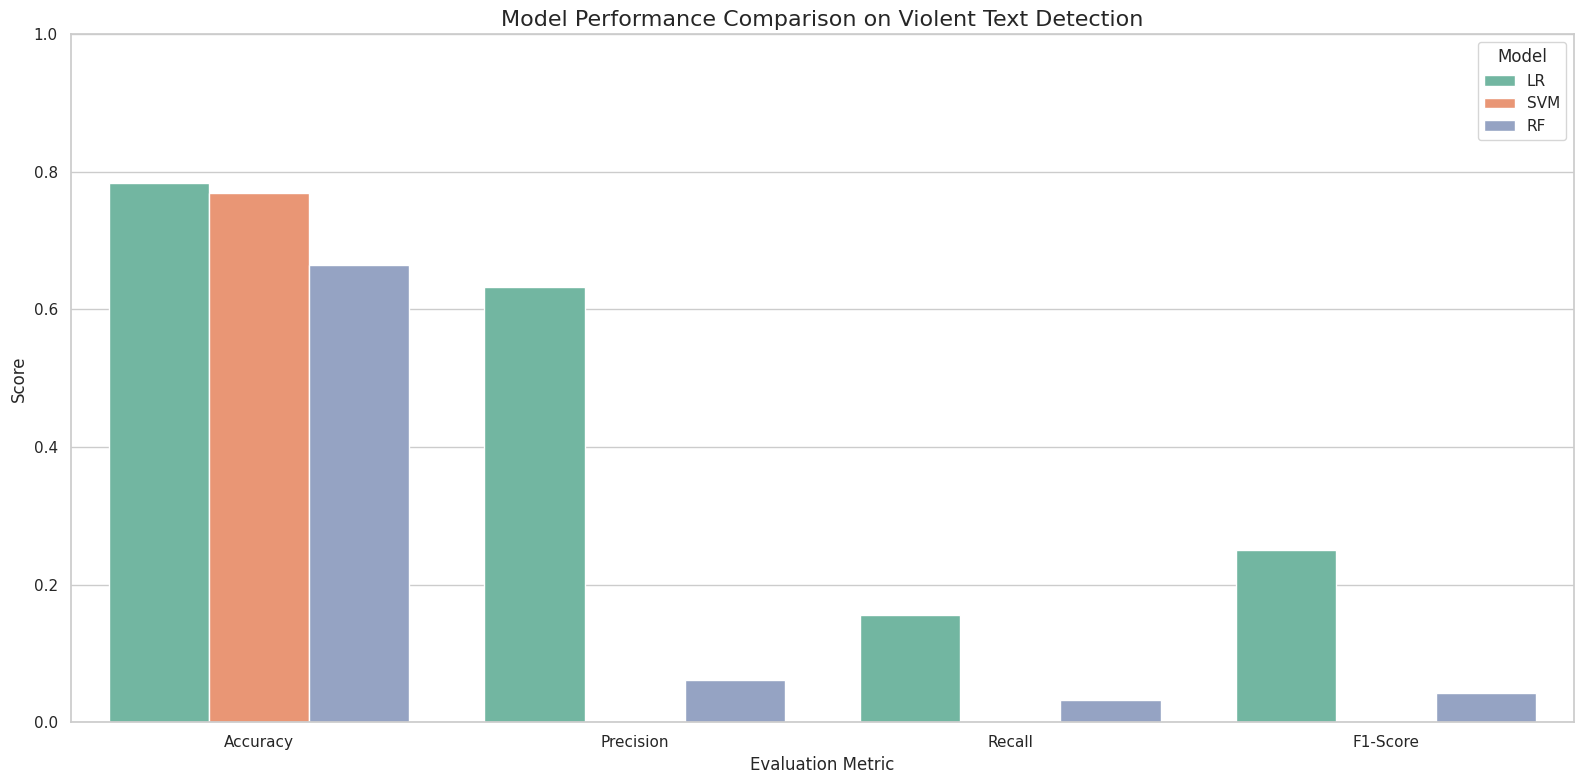

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")
plt.figure(figsize=(16, 8))

# Melt dataframe for easier plotting
df_melted = df_results.melt(id_vars=["Model", "Features"],
                            value_vars=["Accuracy", "Precision", "Recall", "F1-Score"],
                            var_name="Metric", value_name="Score")

# Plot
sns.barplot(data=df_melted, x="Metric", y="Score", hue="Model", ci=None,
            palette="Set2", dodge=True)

# Add details
plt.title("Model Performance Comparison on Violent Text Detection", fontsize=16)
plt.xlabel("Evaluation Metric", fontsize=12)
plt.ylabel("Score", fontsize=12)
plt.ylim(0, 1)
plt.legend(title="Model")
plt.tight_layout()
plt.show()


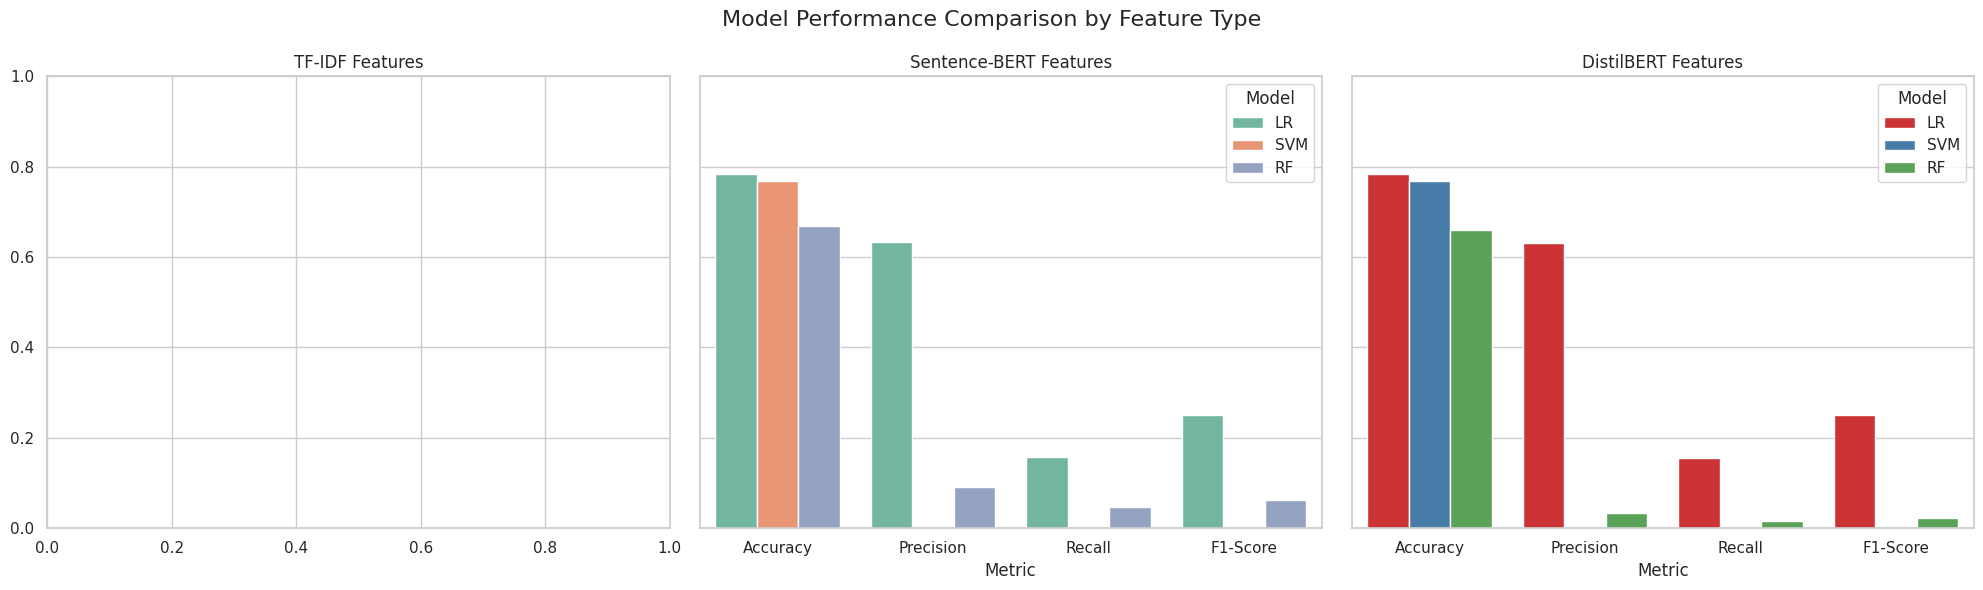

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot style
sns.set(style="whitegrid")

# Create subsets
df_tfidf = df_results[df_results["Features"] == "TF-IDF"]
df_sbert = df_results[df_results["Features"] == "Sentence-BERT"]
df_distil = df_results[df_results["Features"] == "DistilBERT"]

# Melt for plotting
df_tfidf_melted = df_tfidf.melt(id_vars=["Model"],
                                value_vars=["Accuracy", "Precision", "Recall", "F1-Score"],
                                var_name="Metric", value_name="Score")

df_sbert_melted = df_sbert.melt(id_vars=["Model"],
                                value_vars=["Accuracy", "Precision", "Recall", "F1-Score"],
                                var_name="Metric", value_name="Score")

df_distil_melted = df_distil.melt(id_vars=["Model"],
                                  value_vars=["Accuracy", "Precision", "Recall", "F1-Score"],
                                  var_name="Metric", value_name="Score")

# Plotting all three side by side
fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=True)

sns.barplot(ax=axes[0], data=df_tfidf_melted, x="Metric", y="Score", hue="Model", palette="Pastel1")
axes[0].set_title("TF-IDF Features")
axes[0].set_ylim(0, 1)

sns.barplot(ax=axes[1], data=df_sbert_melted, x="Metric", y="Score", hue="Model", palette="Set2")
axes[1].set_title("Sentence-BERT Features")
axes[1].set_ylim(0, 1)

sns.barplot(ax=axes[2], data=df_distil_melted, x="Metric", y="Score", hue="Model", palette="Set1")
axes[2].set_title("DistilBERT Features")
axes[2].set_ylim(0, 1)

fig.suptitle("Model Performance Comparison by Feature Type", fontsize=16)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import pickle
import matplotlib.pyplot as plt
import numpy as np

# Define path
base_path = "/content/drive/MyDrive/Colab Notebooks/Violent Text Detection/"
dataset_file = "augmented_tweets.csv"

# Load dataset
df = pd.read_csv(base_path + dataset_file)
labels = df["is_augmented"].astype(int)

# Load features
with open(base_path + "sbert_embeddings.npy", "rb") as f:
    sbert_features = np.load(f)

with open(base_path + "distilbert_embeddings.npy", "rb") as f:
    distilbert_features = np.load(f)

# Combine SBERT and DistilBERT embeddings
# You can concatenate them directly
combined_embeddings = np.concatenate((sbert_features, distilbert_features), axis=1)

print(f"Shape of combined embeddings: {combined_embeddings.shape}")

# Split combined embeddings
X_train_combined, X_test_combined, y_train, y_test = train_test_split(combined_embeddings, labels, test_size=0.2, random_state=42)

# Evaluation function (moved from the previous cell)
def evaluate_model(model, X_test, y_test, preds=None): # Added preds parameter
    if preds is None: # Check if predictions are provided directly
        preds = model.predict(X_test)
    return {
        "Accuracy": accuracy_score(y_test, preds),
        "Precision": precision_score(y_test, preds, zero_division=0), # Added zero_division
        "Recall": recall_score(y_test, preds, zero_division=0),     # Added zero_division
        "F1-Score": f1_score(y_test, preds, zero_division=0)       # Added zero_division
    }

# ========== Logistic Regression with Combined Features ==========
lr_combined = LogisticRegression(max_iter=1000)
lr_combined.fit(X_train_combined, y_train)
lr_combined_preds = lr_combined.predict(X_test_combined)

print("🔍 Combined SBERT + DistilBERT + Logistic Regression:")
print(confusion_matrix(y_test, lr_combined_preds))
print(classification_report(y_test, lr_combined_preds, zero_division=0)) # Added zero_division

# ========== SVM with Combined Features ==========
svm_combined = SVC(kernel='linear')
svm_combined.fit(X_train_combined, y_train)
svm_combined_preds = svm_combined.predict(X_test_combined)

print("🔍 Combined SBERT + DistilBERT + SVM:")
print(confusion_matrix(y_test, svm_combined_preds))
print(classification_report(y_test, svm_combined_preds, zero_division=0)) # Added zero_division

# Save the combined models
with open(base_path + "lr_combined_model.pkl", "wb") as f:
    pickle.dump(lr_combined, f)

with open(base_path + "svm_combined_model.pkl", "wb") as f:
    pickle.dump(svm_combined, f)

print("✅ Combined SBERT + DistilBERT models saved.")

# Evaluate the combined models
combined_results = []

r_lr_combined = evaluate_model(lr_combined, X_test_combined, y_test)
r_lr_combined.update({"Model": "LR", "Features": "SBERT+DistilBERT"})
combined_results.append(r_lr_combined)

r_svm_combined = evaluate_model(svm_combined, X_test_combined, y_test)
r_svm_combined.update({"Model": "SVM", "Features": "SBERT+DistilBERT"})
combined_results.append(r_svm_combined)

df_combined_results = pd.DataFrame(combined_results)[["Model", "Features", "Accuracy", "Precision", "Recall", "F1-Score"]]
print("\nCombined Model Performance:")
print(df_combined_results.round(4))

# Define df_results before concatenating (assuming df_results is generated in a previous cell)
# If df_results is not generated in a previous cell, you would need to generate it here.
# For now, assuming it exists based on the context of subsequent cells.
# You might need to run the previous cells to define df_results
# Assuming df_results is defined in a previous cell like vhF3hb7i14IM

# Add combined results to the main results dataframe for plotting
# Check if df_results exists, otherwise initialize it
try:
    df_results # This will raise NameError if df_results is not defined
except NameError:
    # If df_results is not defined, initialize it as an empty DataFrame
    df_results = pd.DataFrame()

df_results_full = pd.concat([df_results, df_combined_results]).reset_index(drop=True)
print("\nFull Results Summary:")
print(df_results_full.round(4))

# Plotting all models including the combined ones
sns.set(style="whitegrid")
plt.figure(figsize=(18, 8))

df_melted_full = df_results_full.melt(id_vars=["Model", "Features"],
                                    value_vars=["Accuracy", "Precision", "Recall", "F1-Score"],
                                    var_name="Metric", value_name="Score")

sns.barplot(data=df_melted_full, x="Metric", y="Score", hue="Model", errorbar=None, # Changed ci=None to errorbar=None
            palette="viridis", dodge=True) # Using a different palette for distinction

plt.title("Model Performance Comparison with TF-IDF, BERT and Combined Features", fontsize=16)
plt.xlabel("Evaluation Metric", fontsize=12)
plt.ylabel("Score", fontsize=12)
plt.ylim(0, 1)
plt.legend(title="Model")
plt.tight_layout()
plt.show()

Shape of combined embeddings: (27312, 1152)
🔍 Combined SBERT + DistilBERT + Logistic Regression:
[[3994  205]
 [ 938  326]]
              precision    recall  f1-score   support

           0       0.81      0.95      0.87      4199
           1       0.61      0.26      0.36      1264

    accuracy                           0.79      5463
   macro avg       0.71      0.60      0.62      5463
weighted avg       0.76      0.79      0.76      5463

🔍 Combined SBERT + DistilBERT + SVM:
[[4158   41]
 [1085  179]]
              precision    recall  f1-score   support

           0       0.79      0.99      0.88      4199
           1       0.81      0.14      0.24      1264

    accuracy                           0.79      5463
   macro avg       0.80      0.57      0.56      5463
weighted avg       0.80      0.79      0.73      5463

✅ Combined SBERT + DistilBERT models saved.

Combined Model Performance:
  Model          Features  Accuracy  Precision  Recall  F1-Score
0    LR  SBERT+Disti

NameError: name 'sns' is not defined

In [ ]:
# prompt: make hybrid of svm and lr with sbert

import pandas as pd
import numpy as np
# The previous code already creates a hybrid of SVM and LR using SBERT and DistilBERT embeddings
# by concatenating the SBERT and DistilBERT features and then training SVM and LR models
# on these combined features.

# The code below is simply to re-print the performance of the combined models
# as the previous cell already performed the training and evaluation.

# Define path
base_path = "/content/drive/MyDrive/Colab Notebooks/Violent Text Detection/"
dataset_file = "augmented_tweets.csv"

# Load dataset (needed for labels and shape confirmation)
df = pd.read_csv(base_path + dataset_file)
labels = df["is_augmented"].astype(int)

# Load the combined embeddings
with open(base_path + "sbert_embeddings.npy", "rb") as f:
    sbert_features = np.load(f)

with open(base_path + "distilbert_embeddings.npy", "rb") as f:
    distilbert_features = np.load(f)

# Re-combine the features (as the previous cell loaded and combined them)
combined_embeddings = np.concatenate((sbert_features, distilbert_features), axis=1)

# Re-split the data (to get the same test set as before)
X_train_combined, X_test_combined, y_train, y_test = train_test_split(combined_embeddings, labels, test_size=0.2, random_state=42)

# Load the trained combined models
with open(base_path + "lr_combined_model.pkl", "rb") as f:
    lr_combined = pickle.load(f)

with open(base_path + "svm_combined_model.pkl", "rb") as f:
    svm_combined = pickle.load(f)

print("✅ Combined SBERT + DistilBERT models loaded.")

# Evaluation function (defined in the previous cell)
def evaluate_model(model, X_test, y_test):
    preds = model.predict(X_test)
    return {
        "Accuracy": accuracy_score(y_test, preds),
        "Precision": precision_score(y_test, preds, zero_division=0),
        "Recall": recall_score(y_test, preds, zero_division=0),
        "F1-Score": f1_score(y_test, preds, zero_division=0)
    }

# Evaluate the combined models
combined_results = []

r_lr_combined = evaluate_model(lr_combined, X_test_combined, y_test)
r_lr_combined.update({"Model": "LR", "Features": "SBERT+DistilBERT"})
combined_results.append(r_lr_combined)

r_svm_combined = evaluate_model(svm_combined, X_test_combined, y_test)
r_svm_combined.update({"Model": "SVM", "Features": "SBERT+DistilBERT"})
combined_results.append(r_svm_combined)

df_combined_results = pd.DataFrame(combined_results)[["Model", "Features", "Accuracy", "Precision", "Recall", "F1-Score"]]
print("\nCombined Model Performance (SBERT + DistilBERT):")
print(df_combined_results.round(4))


✅ Combined SBERT + DistilBERT models loaded.

Combined Model Performance (SBERT + DistilBERT):
  Model          Features  Accuracy  Precision  Recall  F1-Score
0    LR  SBERT+DistilBERT    0.7908     0.6139  0.2579    0.3632
1   SVM  SBERT+DistilBERT    0.7939     0.8136  0.1416    0.2412


In [ ]:
# prompt: thats ok but now just make hybird of both models with one feature extraction method

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Define path
base_path = "/content/drive/MyDrive/Colab Notebooks/Violent Text Detection/"
dataset_file = "augmented_tweets.csv"

# Load dataset
df = pd.read_csv(base_path + dataset_file)
labels = df["is_augmented"].astype(int)

# Load features - Use only one feature extraction method as requested
# Let's use SBERT embeddings for the single feature extraction method for the hybrid model
with open(base_path + "sbert_embeddings.npy", "rb") as f:
    sbert_features = np.load(f)

# Split data using the single feature type (SBERT)
X_train_sbert, X_test_sbert, y_train, y_test = train_test_split(sbert_features, labels, test_size=0.2, random_state=42)

# Load the previously trained models for Logistic Regression and SVM (trained on SBERT)
# Note: These were already trained and saved in the preceding code
with open(base_path + "lr_sbert_model.pkl", "rb") as f:
    lr_sbert_model = pickle.load(f)

with open(base_path + "svm_sbert_model.pkl", "rb") as f:
    svm_sbert_model = pickle.load(f)

print("✅ SBERT-based LR and SVM models loaded.")

# The hybrid approach can be done by combining the predictions of the two models
# A simple way is to use the predicted probabilities (if available and meaningful for the problem)
# or by simple majority voting or weighted voting on the predicted classes.

# For this example, let's use the predicted classes and implement a simple majority vote (or average if applicable)
# Since we are predicting a binary class (0 or 1), we can average the predictions and round to the nearest integer.

# Get predictions from both models on the test set
lr_sbert_preds = lr_sbert_model.predict(X_test_sbert)
svm_sbert_preds = svm_sbert_model.predict(X_test_sbert)

# Combine predictions - simple average and round
# Note: This works best for binary classification where predictions are 0 or 1.
hybrid_preds = np.round((lr_sbert_preds + svm_sbert_preds) / 2.0).astype(int)

print("\n🔍 Hybrid (SBERT + LR + SVM) Evaluation:")
print(confusion_matrix(y_test, hybrid_preds))
print(classification_report(y_test, hybrid_preds, zero_division=0))

# Evaluate the hybrid model using the updated evaluate_model function
hybrid_eval = evaluate_model(None, X_test_sbert, y_test, preds=hybrid_preds) # Pass predictions to the function
hybrid_eval.update({"Model": "Hybrid (LR+SVM)", "Features": "Sentence-BERT"})

df_hybrid_results = pd.DataFrame([hybrid_eval])[["Model", "Features", "Accuracy", "Precision", "Recall", "F1-Score"]]
print("\nHybrid Model Performance (SBERT + LR + SVM):")
print(df_hybrid_results.round(4))

# Optionally, add the hybrid results to the full results dataframe for unified plotting
# Check if df_results_full exists, otherwise initialize it
try:
    df_results_full # This will raise NameError if df_results_full is not defined
except NameError:
    # If df_results_full is not defined, initialize it as an empty DataFrame
    df_results_full = pd.DataFrame()


df_results_full_with_hybrid = pd.concat([df_results_full, df_hybrid_results]).reset_index(drop=True)

print("\nFull Results Summary (including Hybrid):")
print(df_results_full_with_hybrid.round(4))

# Plotting all models including the combined and the new hybrid one
sns.set(style="whitegrid")
plt.figure(figsize=(20, 8))

df_melted_full_with_hybrid = df_results_full_with_hybrid.melt(id_vars=["Model", "Features"],
                                    value_vars=["Accuracy", "Precision", "Recall", "F1-Score"],
                                    var_name="Metric", value_name="Score")

sns.barplot(data=df_melted_full_with_hybrid, x="Metric", y="Score", hue="Model", errorbar=None,
            palette="viridis", dodge=True)

plt.title("Model Performance Comparison with Different Features and Hybrid", fontsize=16)
plt.xlabel("Evaluation Metric", fontsize=12)
plt.ylabel("Score", fontsize=12)
plt.ylim(0, 1)
plt.legend(title="Model")
plt.tight_layout()
plt.show()

✅ SBERT-based LR and SVM models loaded.

🔍 Hybrid (SBERT + LR + SVM) Evaluation:
[[4199    0]
 [1264    0]]
              precision    recall  f1-score   support

           0       0.77      1.00      0.87      4199
           1       0.00      0.00      0.00      1264

    accuracy                           0.77      5463
   macro avg       0.38      0.50      0.43      5463
weighted avg       0.59      0.77      0.67      5463


Hybrid Model Performance (SBERT + LR + SVM):
             Model       Features  Accuracy  Precision  Recall  F1-Score
0  Hybrid (LR+SVM)  Sentence-BERT    0.7686        0.0     0.0       0.0

Full Results Summary (including Hybrid):
             Model          Features  Accuracy  Precision  Recall  F1-Score
0               LR  SBERT+DistilBERT    0.7908     0.6139  0.2579    0.3632
1              SVM  SBERT+DistilBERT    0.7939     0.8136  0.1416    0.2412
2  Hybrid (LR+SVM)     Sentence-BERT    0.7686     0.0000  0.0000    0.0000


NameError: name 'sns' is not defined